## Machine learning pipeline to predict whether or not a credit card client will default for their payment in the next month.


## Process:


* Data exploration and pre-processing

* Develop a pipeline to carry out classification

* Compare different metrics and classifiers

The objective is to predict whether or not a credit card client will default for their payment in the next month. I used 2 classifiers: Random Forest and KNN Classifier, and determine the best of a given set of hyperparameters by using grid search.


In [1]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


**Questions (12 marks total)**

Q1.  Explore the credit card data set provided. You can also access it from the this link 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

The data is open for public use and no authorizations are required.

You will build a classification model for this default of credit card clients dataset.  The objective is to predict whether or not a credit card client will default for their payment in the next month.

Make sure you perform your analyses and answer the questions in sections below:

1. Data exploration:  ( 3 marks) 

    - Explore the data ( for example look at the data, plot graphs ( histogram, pair plots)
    
2. Data Preprocessing: (4 marks)

    - Make sure you build a full data pipeline ( ie., use the pipeline to apply transformers and estimators- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html )
    - Do you require any data pre-processing? Are all the features useful? (Use only raw features from this dataset, in other words, no need to create feature crosses or new features)
    - Set the random seed to 123 (For splitting or any other random algorithm)
    - Split data into training (80%) and testing (20%)
    - Use Cross-validation with 5-folds
    - For other parameters, use default

3. Classification: (5 marks)

    - Study the ROC Curve, decide threshold
    - Use 2 classifiers.
    
         a. Random Forest
            - tune only: n_estimators: {4, 5, 10, 20, 50}.  We will be running random forest model using GridSearchCV, determine the best hyperparameter for the given list of n_estimators {4, 5, 10, 20, 50}. n_estimators refers to the number of trees in the forest. We will use CV = 5 and the scoring to be the roc_auc (area under the curve)
          
       b. KNN Classfier 
            - tune only: n_neighbors: {3, 5, 10, 20}. You may perform similar GridSearchCV as in the previous exercise with a given list of n_neightbors. 
        
    - Which one performs better in the cross validation? Note down your observations and give comments.
    
You may refer to the documentation for RandomForests and KNN Classifiers, for the different parameters and options available in the scikit-learn library.
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



### Data set information - from repository:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - X11 = the repayment status in April, 2005. 
    
   The measurement scale for the repayment status is:
    
    - -1 = pay duly; 
    - 1 = payment delay for one month; 
    - 2 = payment delay for two months; 
    - . . .; 
    - 8 = payment delay for eight months; 
    - 9 = payment delay for nine months and above.
    
    
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005; 
    - X13 = amount of bill statement in August, 2005;
    - . . .; 
    - X17 = amount of bill statement in April, 2005.
    
    
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; 
    - . . .;
    - X23 = amount paid in April, 2005.

# 1. DATA EXPLORATION: 


Hypothesis:

- Null: The default of a credit card client for their payment in the next month cannot be predicted from its existing attributes/features.


- Alternative: The default of a credit card client for their payment in the next month can be predicted from its existing attributes/features.

In [3]:
df = pd.read_excel("default of credit card clients.xls", sheet_name = 0, skiprows= 1, header = 0)

In [4]:
df_explore = df.copy()
df_explore.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
25665,25666,40000,2,2,2,26,-1,0,0,0,...,0,44024,18697,1300,1000,0,22373,680,10000,0
16464,16465,80000,2,3,1,59,0,0,0,0,...,50875,50372,49470,3212,2106,2000,1603,1903,2006,0
22386,22387,170000,2,1,2,30,2,2,2,2,...,157577,168094,170922,6800,6500,0,13000,5500,1000,1
10149,10150,200000,2,2,1,41,-2,-2,-2,-2,...,0,0,0,742,0,0,0,0,0,1
8729,8730,50000,1,2,1,43,0,0,0,0,...,9225,9417,9617,1140,1150,331,341,356,330,0


- Column ID not needed since we already have feature "id"
- The dependant variable name is too long, we will change it to default_payment.

In [5]:
df_explore.shape

(30000, 25)

In [6]:
df_explore.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

- The variable 'History of past payment' (PAY_i) starts at PAY_0, PAY_2, ... We will change the name of PAY_0 to PAY_1 for ease of understanding.
- All attributes are integers, we will need to create some dummie variable for all categorical features

In [7]:
df_explore.rename(columns = {'default payment next month':'DEFAULT_PAYMENT', 'PAY_0':'PAY_1'}, inplace = True)

In [8]:
df_explore.drop(columns=['ID'], inplace=True)

In [9]:
df_explore.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
14323,330000,1,2,1,34,0,0,0,0,0,...,17769,18138,13788,1650,1200,510,524,668,300,0
7922,50000,1,1,2,30,0,0,0,2,2,...,55405,55904,52160,2300,4400,0,4000,0,4000,1
2553,210000,2,1,2,26,0,0,0,0,-1,...,0,10790,7373,1008,1000,0,10790,7373,0,0
3556,180000,1,1,2,29,-2,-2,-1,0,0,...,11285,13863,5646,3206,10696,1291,3877,11077,700,0
10027,280000,2,2,2,33,-1,-1,-1,-1,-1,...,0,21339,607,5631,5549,0,21339,607,0,0
4321,70000,2,2,1,30,0,0,0,0,0,...,11965,12178,13962,1300,1200,1507,1000,2000,1000,0
21725,150000,2,2,2,27,0,0,0,0,0,...,57777,51110,52284,3000,3000,2010,2000,2000,2000,0
22160,300000,2,2,2,29,0,0,0,0,0,...,80088,25283,12358,5100,6001,3500,705,3000,2300,0
25011,440000,1,2,1,49,-2,-2,-2,-2,-2,...,2948,0,942,2002,2942,2948,0,942,1000,0
8917,30000,2,2,2,27,0,0,0,0,0,...,27744,28302,29725,2000,2005,1000,1000,2250,0,1


In [10]:
dep_var = ['DEFAULT_PAYMENT']

categorical_vars = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

discrete_vars = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

continuous_vars = ['LIMIT_BAL', 'AGE']

### Exploratory analysis

<AxesSubplot:>

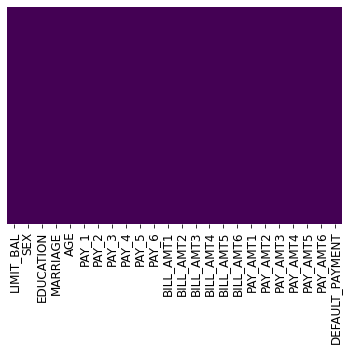

In [11]:
sns.heatmap(df_explore.isnull(), yticklabels=False, cbar=False, cmap='viridis')

- There are no missing values in our dataset, we won't need a pipeline for imputers

#### Exploring discrete variables

In [12]:
df_explore.loc[:, discrete_vars].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


#### Exploring continuous variables

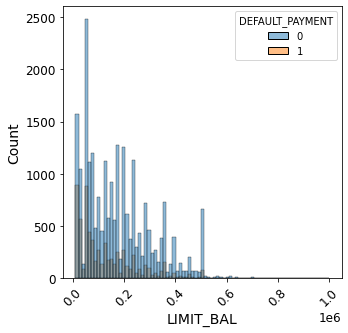

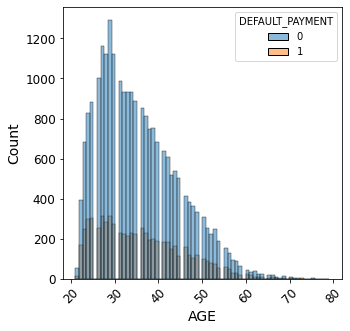

In [13]:
for item in [x for x in continuous_vars]:
    plt.figure(figsize=(5,5))
    sns.histplot(x=item, data=df_explore, hue='DEFAULT_PAYMENT')
    if len(df_explore[item].unique()) > 4:
        plt.xticks(rotation=45)
    plt.show()

- By plotting the continous variables we observe that dataset consists of skewed data of limiting balance and age of clients.
- We have more number of clients having limiting balance between 0 to 200000 currency.
- We have more number of clients from age bracket of 20 to 40, which means that our clients are mostly young to mid aged groups.
- We have maximum clients from 21-30 age group followed by 31-40. We can observe that with increasing age group, the number of clients that will default the payment next month is decreasing. Hence we could think that Age is and important feature to predict the default payment for next month. This might need to be investigate it further.

In [14]:
df_explore[['AGE','DEFAULT_PAYMENT']].corr(method='pearson')

,AGE,DEFAULT_PAYMENT
AGE,1.00000,0.01389
DEFAULT_PAYMENT,0.01389,1.00000


- We would have expected to have a negative strong corr but it is not the case. This might be an indication that Age is not actually a significant feature to predict the clients that will default the payment next month.

#### Exploring categorical variables

In [15]:
df_explore.loc[:, dep_var + categorical_vars].describe()

,DEFAULT_PAYMENT,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.221200,1.603733,1.853133,1.551867,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,0.415062,0.489129,0.790349,0.521970,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,0.000000,1.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,0.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.000000,6.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [16]:
for variable in categorical_vars:
    print(variable, "\n", df_explore[variable].value_counts(), "\n")

SEX 
 2    18112
1    11888
Name: SEX, dtype: int64 

EDUCATION 
 2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64 

MARRIAGE 
 2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64 

PAY_1 
  0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64 

PAY_2 
  0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64 

PAY_3 
  0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64 

PAY_4 
  0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64 

PAY_5 
  0    16947
-1     5539
-2     4546
 2     2626
 3      178

- EDUCATION has values that are different than 1,2,3, and 4, 
- MARRIAGE has value = 0 
- PAY_1 to PAY_6 have values -2 and 0,

All of these values were not defined as categories according to the description of the dataset. We might need to do some corrections.

For PAY_1 to PAY_6 it is not safe to remove these values or assigne them the category others because most of our data belong to the value 0. We will assume the new meaning of this value to be:

- -2: No consumption; 
- -1: Paid in full; 
- 0: The use of revolving credit; 
- 1 = payment delay for one month; 
- 2 = payment delay for two months; . . .;
- 8 = payment delay for eight months; 
- 9 = payment delay for nine months and above.

As described in a discussion threat in kagle:

https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/discussion/34608
    

In [17]:
df_explore['EDUCATION'] = df_explore['EDUCATION'].apply(lambda x: 4 if x>4 or x<1 else x)
df_explore['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [18]:
df_explore['MARRIAGE'] = df_explore['MARRIAGE'].apply(lambda x: 3 if x==0 else x)
df_explore['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Now they seem to be no errors in the variables EDUCATION and MARRIAGE. 

In the case of the variable PAY_1 to PAY_6 it is not safe to assume that these values belong to another category, nor would be good to eliminate them from the dataset.  Thus, we will assume that the variable PAY_i is .... as described in .... by the author of the dataset. 

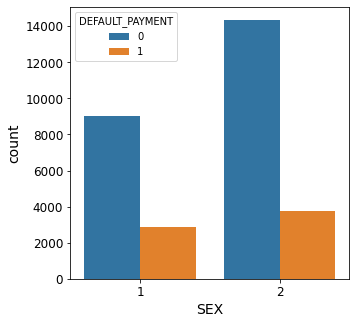

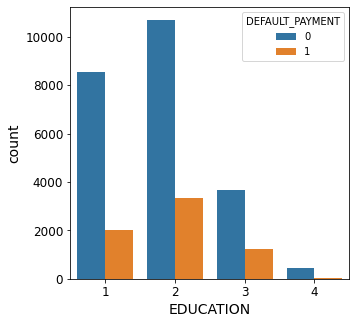

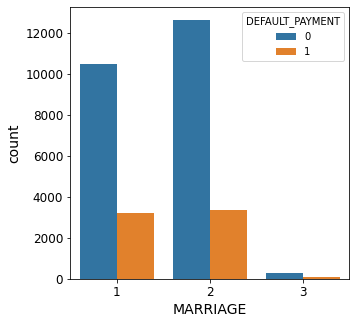

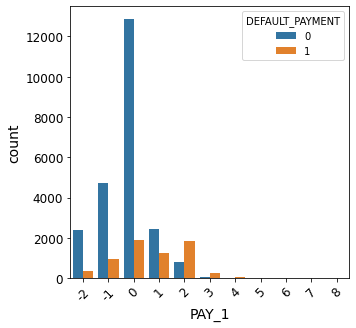

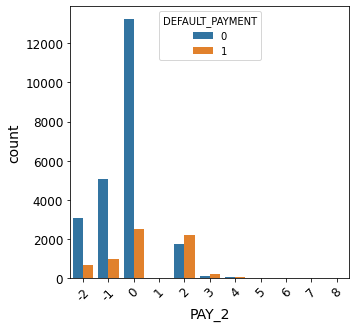

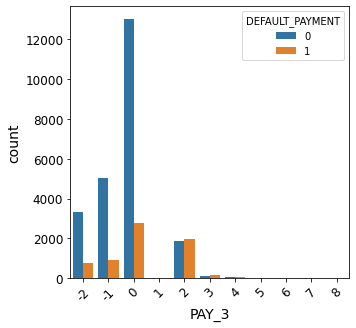

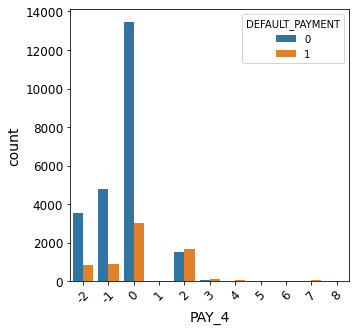

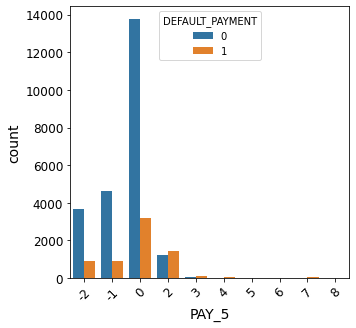

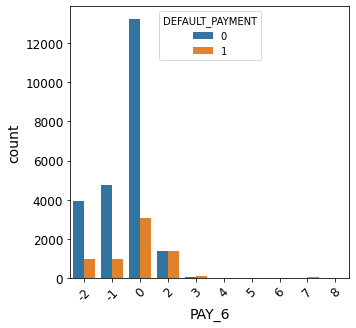

In [19]:
for item in [x for x in categorical_vars]:
    plt.figure(figsize=(5,5))
    sns.countplot(x=item, data=df_explore, hue='DEFAULT_PAYMENT')
    if len(df_explore[item].unique()) > 4:
        plt.xticks(rotation=45)
    plt.show()

- We can observe that slightly more women got default payment than men even tought there are more women than men in the dataset.
- Most of the people in our dataset went to university and graduate school.
- There are more single people than married.
- Most of the people in our data set has a repayment status = 0, which means they used revolving credit.

#### Exploring target variable

In [20]:
df_explore['DEFAULT_PAYMENT'].value_counts()

0    23364
1     6636
Name: DEFAULT_PAYMENT, dtype: int64

Our dependant variable doesn't seem to have any discrepancies

<AxesSubplot:xlabel='DEFAULT_PAYMENT', ylabel='count'>

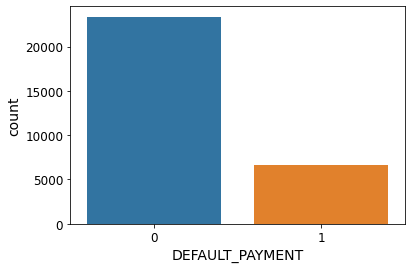

In [21]:
sns.countplot(x='DEFAULT_PAYMENT', data=df_explore)

In [22]:
df_explore.groupby(['DEFAULT_PAYMENT'])['LIMIT_BAL'].count()/df_explore['DEFAULT_PAYMENT'].count()*100

DEFAULT_PAYMENT
0    77.88
1    22.12
Name: LIMIT_BAL, dtype: float64

- The percentage of people getting default payment next month is 77.88% of the total
- Data is not very balanced

### Distribution of variables

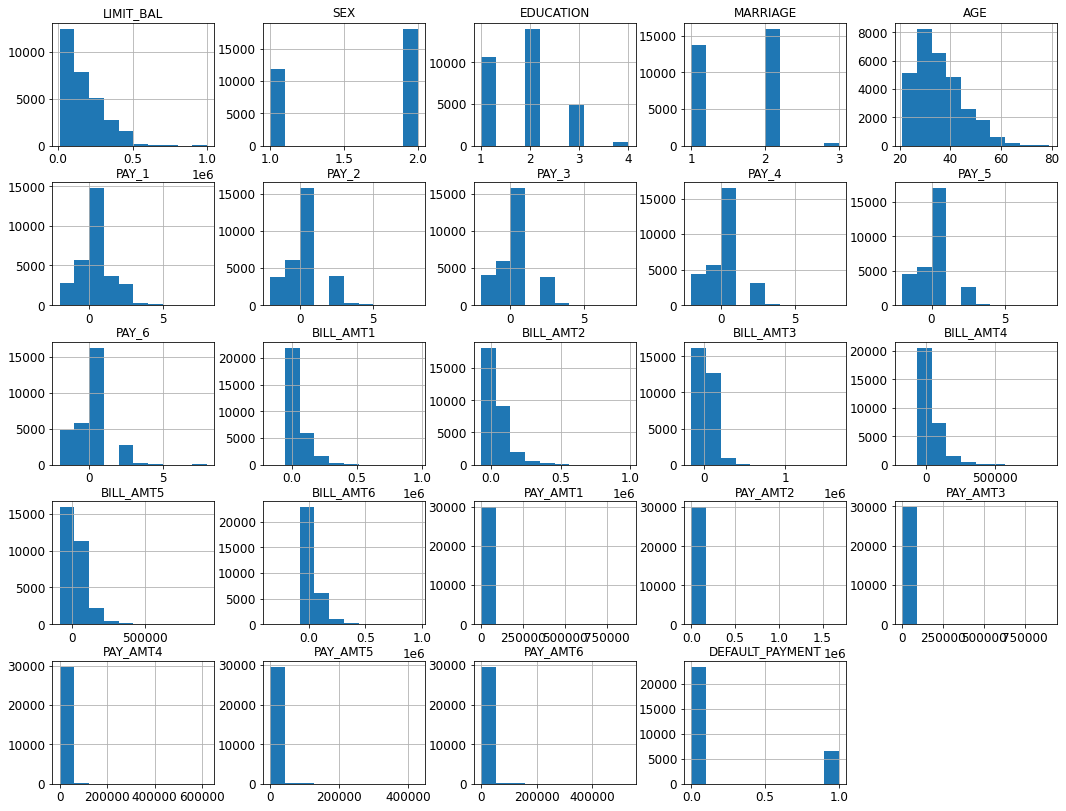

In [23]:
df_explore.hist(figsize=(18,14))
plt.show()

- There seem to be high outliers in some attributes

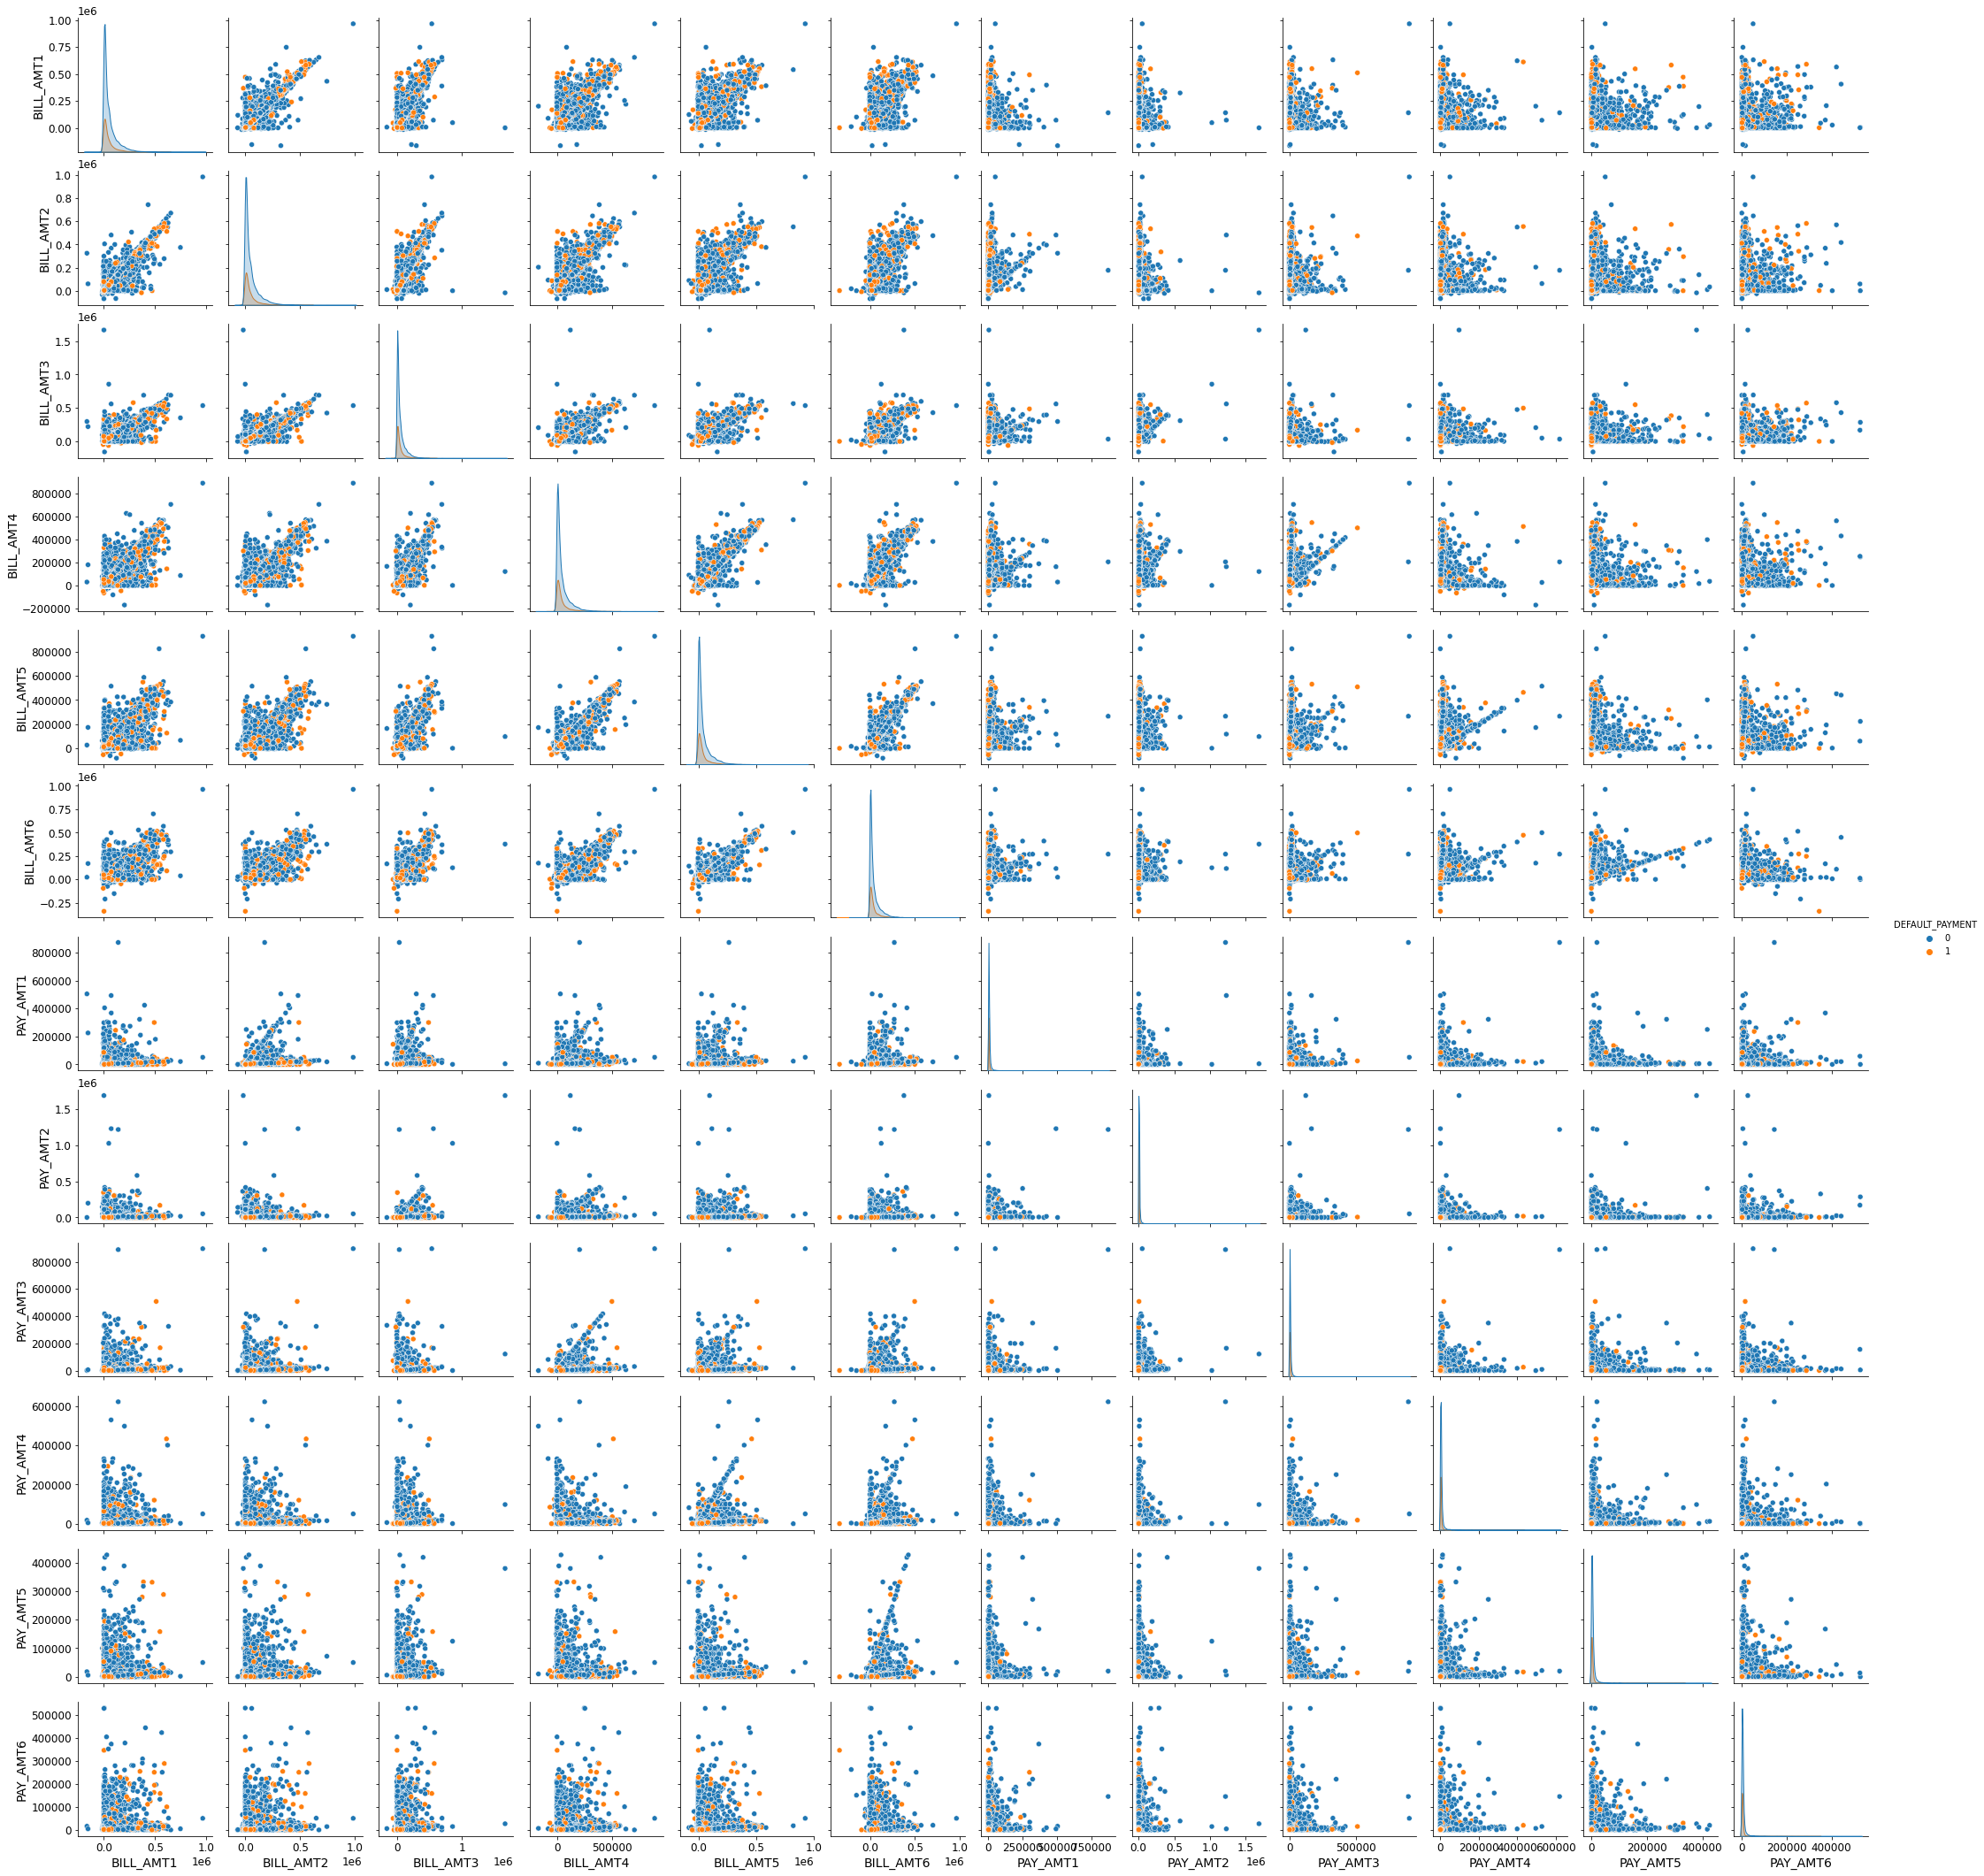

In [24]:
sns.pairplot(data=df_explore.loc[:, ['DEFAULT_PAYMENT'] + discrete_vars],hue='DEFAULT_PAYMENT')
plt.show()

- Bill and payments seem to be correlated which is expected.

#### Correlation

<AxesSubplot:>

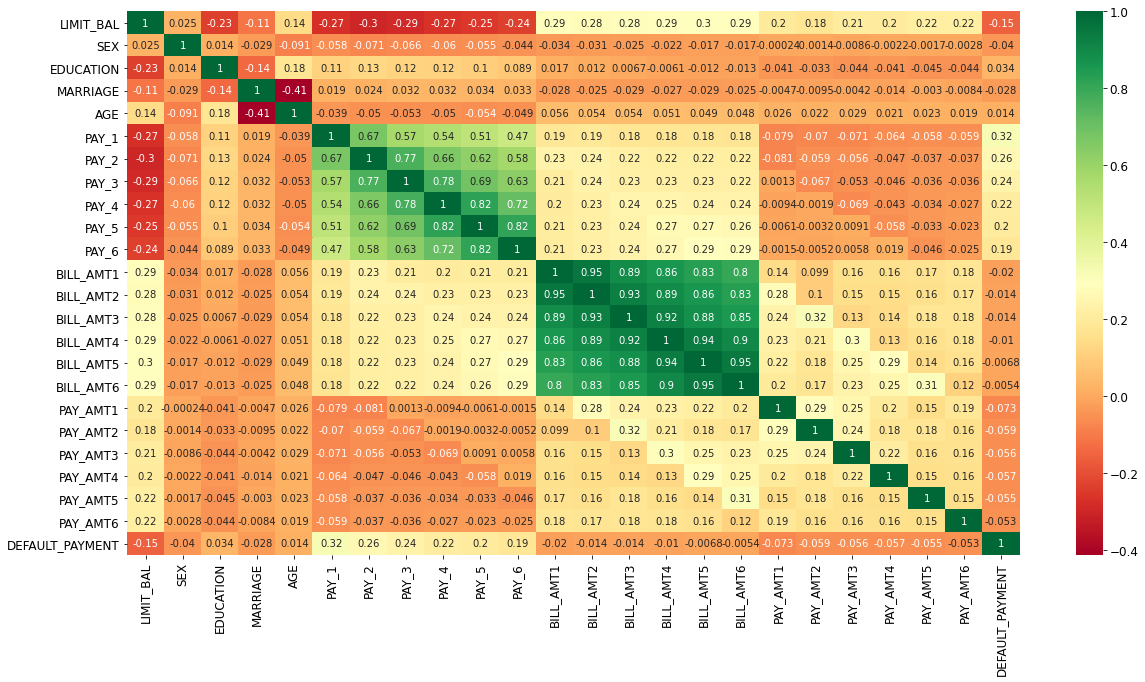

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(df_explore.corr(), annot=True, cmap="RdYlGn")

In [26]:
cor = df_explore.corr(method='pearson')
cor_target = abs(cor["DEFAULT_PAYMENT"])
relevant_features = cor_target[cor_target > 0.2]
relevant_features.index

Index(['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'DEFAULT_PAYMENT'], dtype='object')

- There is a high corr between payment and BILLAMT which was expected, but there is no clear direct corr of any attribute with our target. The highets corr would be with PAY_1 of only 0.32 which is not really significant, therefore we will use other strategy to select the most significat features

### Feature selection 

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

In [28]:
df_explore = pd.get_dummies(df_explore, columns=categorical_vars)
df_explore.drop(columns=['SEX_2'], inplace=True)

In [29]:
df_explore.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,...,0.163167,0.191333,0.542867,0.092200,0.006133,0.001633,0.000433,0.000633,0.001533,0.000067
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,...,0.369524,0.393357,0.498167,0.289313,0.078076,0.040382,0.020812,0.025159,0.039128,0.008165
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
columns = df_explore.columns.difference(['DEFAULT_PAYMENT'])
tfmr = MinMaxScaler()# Scaling features 
df_explore[columns]=tfmr.fit_transform(df_explore[columns].values)

In [31]:
df_explore.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.159075,0.249750,0.191846,0.112893,0.112157,0.200891,0.120620,0.290851,0.006483,0.003516,...,0.163167,0.191333,0.542867,0.092200,0.006133,0.001633,0.000433,0.000633,0.001533,0.000067
std,0.131058,0.158929,0.065159,0.067546,0.038076,0.060601,0.060284,0.045766,0.018961,0.013680,...,0.369524,0.393357,0.498167,0.289313,0.078076,0.040382,0.020812,0.025159,0.039128,0.008165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040404,0.120690,0.149668,0.069053,0.087808,0.162330,0.082396,0.261944,0.001145,0.000495,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.131313,0.224138,0.166324,0.086340,0.097374,0.178084,0.098600,0.274097,0.002404,0.001193,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.232323,0.344828,0.205887,0.126964,0.119378,0.211482,0.130415,0.298787,0.005731,0.002969,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
X1 = df_explore[df_explore.columns.difference(['DEFAULT_PAYMENT'])]
y1 = df_explore['DEFAULT_PAYMENT']

In [33]:
uni = SelectKBest(f_classif, k = 10)
fit = uni.fit(X1, y1)

In [34]:
f1=X1.columns[fit.get_support(indices=True)].tolist()
f1

['LIMIT_BAL',
 'PAY_1_0',
 'PAY_1_2',
 'PAY_1_3',
 'PAY_2_0',
 'PAY_2_2',
 'PAY_3_2',
 'PAY_4_2',
 'PAY_5_2',
 'PAY_6_2']

In [35]:
uni2 = SelectKBest(chi2, k = 10)
fit2 = uni2.fit(X1, y1)

In [36]:
f2=X1.columns[fit2.get_support(indices=True)].tolist()
f2

['PAY_1_0',
 'PAY_1_1',
 'PAY_1_2',
 'PAY_1_3',
 'PAY_2_0',
 'PAY_2_2',
 'PAY_3_2',
 'PAY_4_2',
 'PAY_5_2',
 'PAY_6_2']

In [37]:
f = set(f1+f2)
f

{'LIMIT_BAL',
 'PAY_1_0',
 'PAY_1_1',
 'PAY_1_2',
 'PAY_1_3',
 'PAY_2_0',
 'PAY_2_2',
 'PAY_3_2',
 'PAY_4_2',
 'PAY_5_2',
 'PAY_6_2'}

In [38]:
features=['LIMIT_BAL','PAY_1_0','PAY_1_1','PAY_1_2','PAY_1_3','PAY_2_0','PAY_2_2','PAY_3_2','PAY_4_2','PAY_5_2','PAY_6_2']

We can observe that when using f_classif and chi2, both classifier choose the same features except for LIMIT_BAL which is only signficant when using chi2. We will evaluate our model with all the predictors and then only with the features selected in this step.

# 2. DATA PROCESSING: 

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

np.random.seed(123)

In [40]:
def rmse(a, b):
    return np.sqrt(np.mean((a-b)**2))
pd.options.display.max_columns = None
# to make this notebook's output identical at every run


- As we saw in the first section of EA we need some pre processing of the data before applying our model:
    - ID column = id col
    - Change name of target variable and PAY_0
    - Correct values in variables EDUCATION and MARRIAGE
    - No imputation needed since there are no missing values

In [41]:
df = pd.read_excel("default of credit card clients.xls", sheet_name = 0, skiprows= 1, header = 0, index_col='ID')

In [42]:
#Pre-processing of the dataset
df.rename(columns = {'default payment next month':'DEFAULT_PAYMENT', 'PAY_0':'PAY_1'}, inplace = True)
df['EDUCATION'] = df['EDUCATION'].apply(lambda x: 4 if x>4 or x<1 else x)
df['MARRIAGE'] = df['MARRIAGE'].apply(lambda x: 3 if x==0 else x)

In [43]:
df.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
ID,,,,,,,,,,,,,,,,,,,,,,,,
25666,40000,2,2,2,26,-1,0,0,0,-1,0,28991,24391,13600,0,44024,18697,1300,1000,0,22373,680,10000,0
16465,80000,2,3,1,59,0,0,0,0,0,0,75662,70073,53169,50875,50372,49470,3212,2106,2000,1603,1903,2006,0
22387,170000,2,1,2,30,2,2,2,2,2,2,155910,158819,161487,157577,168094,170922,6800,6500,0,13000,5500,1000,1
10150,200000,2,2,1,41,-2,-2,-2,-2,-2,-2,23570,735,0,0,0,0,742,0,0,0,0,0,1
8730,50000,1,2,1,43,0,0,0,0,0,0,8214,8034,9044,9225,9417,9617,1140,1150,331,341,356,330,0
25296,60000,2,2,2,24,0,0,0,0,0,0,50840,49592,44412,45402,35704,36524,2100,1847,1837,1139,1254,1387,0
8877,50000,2,2,1,37,0,0,0,0,0,0,25234,23518,21746,18082,18461,18830,1384,1300,700,670,676,700,0
12349,140000,2,3,1,46,0,0,0,0,0,0,132586,135165,125427,128016,127323,130020,4800,4500,4600,4800,4800,4500,0
3859,200000,1,2,1,36,1,-2,-1,-1,-1,-1,-1,-1,296,299,278,4575,0,297,303,279,4597,0,0


#### TRAIN SPLIT

In [44]:
TARGET = "DEFAULT_PAYMENT"
columns_predictors = [col for col in df.columns if col  not in [TARGET]]
columns_categorical = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
columns_numerical = [col for col in columns_predictors if col not in columns_categorical]

In [45]:
X = df[columns_predictors]
y = df[TARGET]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10086, stratify=y) #stratified sampling based on the target
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (22500, 23)
X_test.shape: (7500, 23)
y_train.shape: (22500,)
y_test.shape: (7500,)


#### PIPELINE

In [47]:
pipeline_categorical = Pipeline([('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")), ])
pipeline_numerical = Pipeline([('scl', MinMaxScaler(feature_range=(0,1))),])
pipeline_full = ColumnTransformer([("categorical", pipeline_categorical, columns_categorical),("numerical", pipeline_numerical, columns_numerical),])

In [48]:
pipeline_full.fit(X_train)
X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)
print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")

X_train_transformed.shape: (22500, 87)
X_test_transformed.shape: (7500, 87)


### Cross-Validation Split

In [49]:
num_folds = 5
seed = 123
kfold = KFold(n_splits=num_folds, random_state=seed)


C:\Users\Natalia Restrepo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [50]:
max_features = 3
num = [4,5,10,20,50]

for num in num:
    model_RFC = RandomForestClassifier(n_estimators=num)#, max_features=max_features)
    results_RFC = cross_val_score(model_RFC, X_train_transformed, y_train, cv=kfold)
    model_RFC.fit(X_train_transformed, y_train)
    print('n_stimator=',num,'/ Accuracy: %.3f%% (%.3f%%)' % (results_RFC.mean()*100.0, results_RFC.std()*100.0))

n_stimator= 4 / Accuracy: 79.573% (0.547%)
n_stimator= 5 / Accuracy: 79.098% (0.422%)
n_stimator= 10 / Accuracy: 80.524% (0.552%)
n_stimator= 20 / Accuracy: 81.231% (0.414%)
n_stimator= 50 / Accuracy: 81.516% (0.487%)


In [51]:
model_RFC = RandomForestClassifier(n_estimators=50)
model_RFC.fit(X_train_transformed, y_train)

RandomForestClassifier(n_estimators=50)

In [52]:
num = [3,5,10,20]

for num in num:
    model_KNN = KNeighborsClassifier(n_neighbors=num)
    results_KNN = cross_val_score(model_KNN, X_train_transformed, y_train, cv=kfold)
    print('n_neighbors=',num,'/ Accuracy: %.3f%% (%.3f%%)' % (results_KNN.mean()*100.0, results_KNN.std()*100.0))

n_neighbors= 3 / Accuracy: 78.084% (0.517%)
n_neighbors= 5 / Accuracy: 79.787% (0.367%)
n_neighbors= 10 / Accuracy: 81.262% (0.443%)
n_neighbors= 20 / Accuracy: 81.600% (0.454%)


In [53]:
model_KNN = KNeighborsClassifier(n_neighbors=20)
model_KNN.fit(X_train_transformed, y_train)

KNeighborsClassifier(n_neighbors=20)

### Model

The accuracy difference between RFC and KNN is not too big. We will evaluate both models


In [54]:
y_pred_RFC = model_RFC.predict(X_test_transformed)
y_pred_proba_RFC = model_RFC.predict_proba(X_test_transformed) 

print('MODEL RFC')
print(f"accuracy_score: {accuracy_score(y_test, y_pred_RFC)}")
print(f"precision_score: {precision_score(y_test, y_pred_RFC)}")
print(f"recall_score: {recall_score(y_test, y_pred_RFC)}")
print(f"f1_score: {f1_score(y_test, y_pred_RFC)}")
print(f"roc_auc_score: {roc_auc_score(y_test, y_pred_proba_RFC[:,1])}")

MODEL RFC
accuracy_score: 0.8148
precision_score: 0.6506696428571429
recall_score: 0.351416515973478
f1_score: 0.4563600782778865
roc_auc_score: 0.7578574849546744


In [55]:
y_pred_KNN = model_KNN.predict(X_test_transformed)
y_pred_proba_KNN = model_KNN.predict_proba(X_test_transformed) 

print('MODEL KNN')
print(f"accuracy_score: {accuracy_score(y_test, y_pred_KNN)}")
print(f"precision_score: {precision_score(y_test, y_pred_KNN)}")
print(f"recall_score: {recall_score(y_test, y_pred_KNN)}")
print(f"f1_score: {f1_score(y_test, y_pred_KNN)}")
print(f"roc_auc_score: {roc_auc_score(y_test, y_pred_proba_KNN[:,1])}")

MODEL KNN
accuracy_score: 0.8150666666666667
precision_score: 0.6878453038674033
recall_score: 0.30018083182640143
f1_score: 0.4179605539236257
roc_auc_score: 0.7417406149437903


We can observe that the model RFC is has a slighthy better power of prediction but the difference is still not too significant

# 3. Classification

- Model using all predictors

No handles with labels found to put in legend.


No Skill: ROC AUC=0.500
Model RFC: ROC AUC=0.758


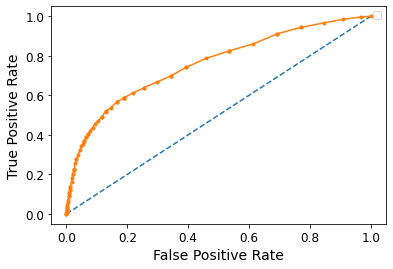

In [58]:
#Generate a no skill prediction
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model_RFC.predict_proba(X_test_transformed)
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Model RFC: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

No handles with labels found to put in legend.


No Skill: ROC AUC=0.500
Model KNN: ROC AUC=0.742


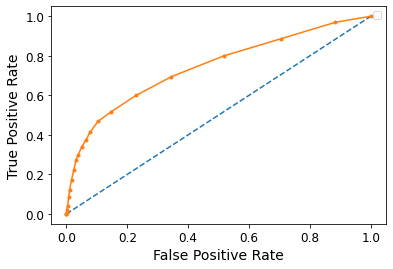

In [59]:
#Generate a no skill prediction
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model_KNN.predict_proba(X_test_transformed)
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Model KNN: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The diagonal line shows where the true positive rate equals the false positive rate. Points above the diagonal line represent good classification results.This means that having a larger area under the curve (AUC) is better. The results of our Models shows that the model RFC with has a slightly better predictive power with an AUC of 0.751

In [60]:
#Confusion Matrix 

In [61]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':30})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

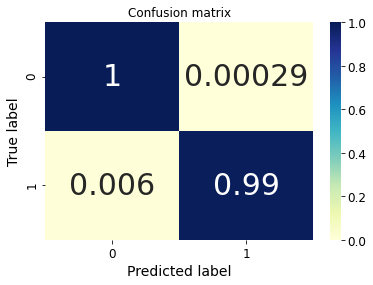

In [62]:
from sklearn.metrics import confusion_matrix
cm_RFC = confusion_matrix(y_train, model_RFC.predict(X_train_transformed))
cm_norm_RFC = cm_RFC / cm_RFC.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm_RFC, classes = model_RFC.classes_, title='Confusion matrix')

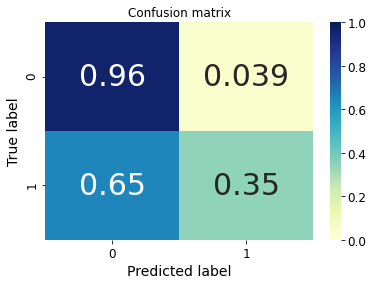

In [63]:
cm_KNN = confusion_matrix(y_train, model_KNN.predict(X_train_transformed))
cm_norm_KNN = cm_KNN / cm_KNN.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm_KNN, classes = model_KNN.classes_, title='Confusion matrix')

The precision parameter in the confusion matrix  denotes the proportion of predicted positive cases that are in fact real positives. In this case, this parameter gives us an estimate of the ability of the model to correctly identify people who will default next month. 

Contrarily, the category false positive (Type 1 error) on the confusion matrix, estimates the proportion of positive cases that are in fact  negative. In our model, this corresponds to the number of people that were predicted with default payment next month, when  in fact they weren't. 

From the results obtained, the RFC seems to be highly good at identifying default payment whereas Model KNN has bigger chances of wrongly categorizing a person as default payment next month. This could be due that model RFC is overfitting 


### Model with only features selected

Finally we will apply the models to the dataFrame using only the features selected in step: Feature Selection. 

Note: After trying for a long time, I was not able to grab only the feautres I wanted to test after applying the pipeline. Since the assigment required to build and apply the pipeline that's why I decided to do it this way but I will continue working on using the pipeline for future projects. 

In [64]:
df_explore[features].sample(10)

,LIMIT_BAL,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_2_0,PAY_2_2,PAY_3_2,PAY_4_2,PAY_5_2,PAY_6_2
25016,0.252525,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23766,0.191919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14070,0.242424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8968,0.060606,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15398,0.131313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8317,0.050505,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21319,0.090909,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17280,0.010101,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2657,0.030303,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
6288,0.393939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
X2 = df_explore[features]
y2 = df_explore['DEFAULT_PAYMENT']

In [66]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=10086, stratify=y) #stratified sampling based on the target
print(f"X_train.shape: {X_train2.shape}")
print(f"X_test.shape: {X_test2.shape}")
print(f"y_train.shape: {y_train2.shape}")
print(f"y_test.shape: {y_test2.shape}")

X_train.shape: (22500, 11)
X_test.shape: (7500, 11)
y_train.shape: (22500,)
y_test.shape: (7500,)


In [67]:
model_RFC = RandomForestClassifier(n_estimators=50)
model_RFC.fit(X_train2, y_train2)

RandomForestClassifier(n_estimators=50)

In [68]:
y_pred_RFC = model_RFC.predict(X_test2)
y_pred_proba_RFC = model_RFC.predict_proba(X_test2) 

print('MODEL RFC')
print(f"accuracy_score: {accuracy_score(y_test2, y_pred_RFC)}")
print(f"precision_score: {precision_score(y_test2, y_pred_RFC)}")
print(f"recall_score: {recall_score(y_test2, y_pred_RFC)}")
print(f"f1_score: {f1_score(y_test2, y_pred_RFC)}")
print(f"roc_auc_score: {roc_auc_score(y_test2, y_pred_proba_RFC[:,1])}")

MODEL RFC
accuracy_score: 0.8064
precision_score: 0.6138613861386139
recall_score: 0.33634719710669075
f1_score: 0.4345794392523364
roc_auc_score: 0.7292287718161995


No handles with labels found to put in legend.


No Skill: ROC AUC=0.500
Model RFC: ROC AUC=0.729


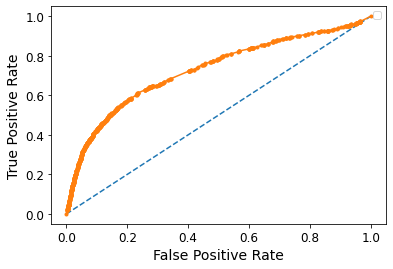

In [70]:
#Generate a no skill prediction
ns_probs = [0 for _ in range(len(y_test2))]
lr_probs = model_RFC.predict_proba(X_test2)
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test2, ns_probs)
lr_auc = roc_auc_score(y_test2, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Model RFC: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test2, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test2, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

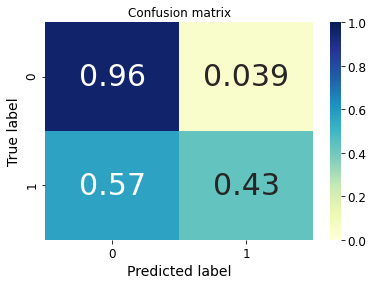

In [71]:
cm_RFC = confusion_matrix(y_train2, model_RFC.predict(X_train2))
cm_norm_RFC = cm_RFC / cm_RFC.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm_RFC, classes = model_RFC.classes_, title='Confusion matrix')

We observe that there is not a big difference either in the ROC curve. The model with all the feautes has a sligthly better predictive power but there is no huge difference. We do apprietate a significant difference in the conufsion matrix showing a bigger chance of wrongly predicting the target when using the model with only the features selected. 

What it should be done now (in the future) is to do a better feature selection, this could be done by dropping one by one features that have multicolinearity or other kind of analysis. Also we noticed since the beginning that our dataset was very unbalanced so we could explore other options when having this kind of data. For the porpuse of this assignment I will not do this in this project. 